## Imports

In [1]:
# !pip3 install quantstats
from datetime import datetime
%matplotlib inline
import quantstats as qs
import pandas as pd
import numpy as np

## Testing Library

In [2]:
qs.extend_pandas()
stock = qs.utils.download_returns('AMZN')
qs.stats.sharpe(stock)
stock.sharpe()

0.7512579043290244

In [3]:
stock

Date
1997-05-15 00:00:00-04:00         NaN
1997-05-16 00:00:00-04:00   -0.117028
1997-05-19 00:00:00-04:00   -0.012040
1997-05-20 00:00:00-04:00   -0.042685
1997-05-21 00:00:00-04:00   -0.127392
                               ...   
2023-04-13 00:00:00-04:00    0.046714
2023-04-14 00:00:00-04:00    0.001074
2023-04-17 00:00:00-04:00    0.002244
2023-04-18 00:00:00-04:00   -0.004283
2023-04-19 00:00:00-04:00    0.019550
Name: Close, Length: 6525, dtype: float64

# For False Data

## generate dataframe

In [4]:
date_range = pd.date_range("2021-01-01 10:10:00", "2023-04-01 10:10:00", freq="B", tz='Asia/Kolkata')

random_pnl = np.random.choice([1000,-1000], len(date_range))
date_range = date_range.tz_localize(None)
y = pd.DataFrame(
    random_pnl,
    index=date_range,
    columns=["PnL"]
)
y
# random_pnl

,PnL
2021-01-01 10:10:00,1000
2021-01-04 10:10:00,-1000
2021-01-05 10:10:00,-1000
2021-01-06 10:10:00,1000
2021-01-07 10:10:00,1000
...,...
2023-03-27 10:10:00,1000
2023-03-28 10:10:00,-1000
2023-03-29 10:10:00,-1000
2023-03-30 10:10:00,-1000


## Obtain total profit by cummulative sum

In [5]:
returns_df_y = y
start_amount = 100000
returns_df_y["total_profit"] = returns_df_y.PnL.cumsum() + start_amount
returns_df_y

,PnL,total_profit
2021-01-01 10:10:00,1000,101000
2021-01-04 10:10:00,-1000,100000
2021-01-05 10:10:00,-1000,99000
2021-01-06 10:10:00,1000,100000
2021-01-07 10:10:00,1000,101000
...,...,...
2023-03-27 10:10:00,1000,82000
2023-03-28 10:10:00,-1000,81000
2023-03-29 10:10:00,-1000,80000
2023-03-30 10:10:00,-1000,79000


In [6]:
profit_y = returns_df_y.total_profit
profit_y

2021-01-01 10:10:00    101000
2021-01-04 10:10:00    100000
2021-01-05 10:10:00     99000
2021-01-06 10:10:00    100000
2021-01-07 10:10:00    101000
                        ...  
2023-03-27 10:10:00     82000
2023-03-28 10:10:00     81000
2023-03-29 10:10:00     80000
2023-03-30 10:10:00     79000
2023-03-31 10:10:00     80000
Name: total_profit, Length: 586, dtype: int64

## generate statistics using quantstats

In [7]:
print(f"SHARPE : \n{qs.stats.sharpe(profit_y)}")
print(f"\nCOMPSUM : \n{qs.stats.compsum(profit_y)}")
print(f"\nPCT_RANK : \n{qs.stats.pct_rank(profit_y)}")
print(f"\nCOMP : \n{qs.stats.comp(profit_y)}")

SHARPE : 
-0.5017359647300421

COMPSUM : 
2021-01-01 10:10:00                 101000
2021-01-04 10:10:00            10100201000
2021-01-05 10:10:00        999929999300000
2021-01-06 10:10:00    7760279491451641920
2021-01-07 10:10:00   -6166775811562500920
                              ...         
2023-03-27 10:10:00   -5402014370347011304
2023-03-28 10:10:00    6650159986011328832
2023-03-29 10:10:00   -3096788964860188224
2023-03-30 10:10:00   -8705107383656273832
2023-03-31 10:10:00    2633214871139405016
Name: total_profit, Length: 586, dtype: int64

PCT_RANK : 
2021-01-01 10:10:00    100.000000
2021-01-04 10:10:00     50.000000
2021-01-05 10:10:00     33.333333
2021-01-06 10:10:00     62.500000
2021-01-07 10:10:00     90.000000
                          ...    
2023-03-27 10:10:00     37.500000
2023-03-28 10:10:00     33.333333
2023-03-29 10:10:00     24.166667
2023-03-30 10:10:00     12.500000
2023-03-31 10:10:00     26.666667
Name: total_profit, Length: 586, dtype: float64

COM

/home/prithvirajgotepatil/virtualenvs/jupyter_venv/lib/python3.10/site-packages/quantstats/utils.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return _pd.concat(dfs, 1, sort=True)


## generate plots using quantstats

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


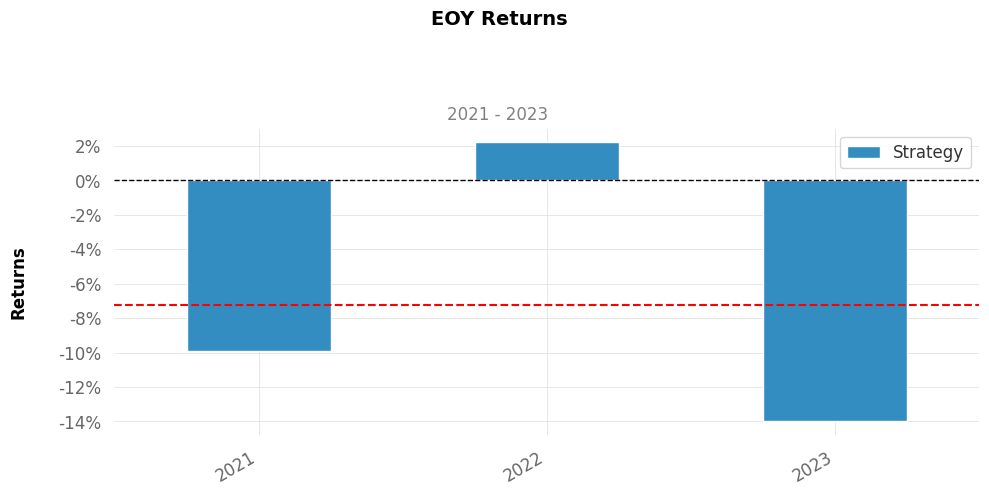

In [8]:
qs.plots.yearly_returns(profit_y, savefig='yearly_returns_fake.png')

## generate full report (tear-file)

In [9]:
qs.reports.html(profit_y, title='test', output='', download_filename='fake_profit.html')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

In [10]:
from datetime import datetime
%matplotlib inline
import quantstats as qs
import pandas as pd
import numpy as np

# For Real Data

## read P n L data from csv file

In [11]:
FILENAME = 'oms_pnl_table_4.csv'
x = pd.read_csv(FILENAME)
returns = x[['EX_TIME', 'P&L']]
returns_df_x = returns.rename(columns={'EX_TIME':'timestamp', 'P&L':'PnL'})
x


,Unnamed: 0,INST,EN_TIME,EN_ID,EN_TT,EN_Q,EN_PRICE,EN_CODE,EN_VAR,EX_TIME,...,EX_Q,EX_PRICE,EX_CODE,EX_VAR,P&L,ROI,P&L %,ROI %,Equity Curve,Drawdown %
0,0,NSE_EQ:SBIN,2022-01-06 10:00:00+05:30,b1361cda3e694740951b205196309b96,SELL,2,487.30,INTRADAY,MARKET,2022-01-06 11:00:00+05:30,...,2,490.65,INTRADAY,MARKET,-6.7,-6.7,-0.69,-0.01,49993.3,-0.01
1,1,NSE_EQ:SBIN,2022-01-06 11:00:00+05:30,f18b40de5e0147de88aa1e7eae27542c,BUY,2,490.65,INTRADAY,MARKET,2022-01-06 13:30:00+05:30,...,2,489.80,INTRADAY,MARKET,-1.7,-8.4,-0.17,-0.02,49991.6,-0.02
2,2,NSE_EQ:SBIN,2022-01-06 13:30:00+05:30,b238d4866dab43a78a1e7cecf25d692d,SELL,2,489.80,INTRADAY,MARKET,2022-01-06 13:45:00+05:30,...,2,491.15,INTRADAY,MARKET,-2.7,-11.1,-0.28,-0.02,49988.9,-0.02
3,3,NSE_EQ:SBIN,2022-01-06 13:45:00+05:30,01e40291764d468688b0f290650bc9f2,BUY,2,491.15,INTRADAY,MARKET,2022-01-06 15:30:00+05:30,...,2,491.35,INTRADAY,MARKET,0.4,-10.7,0.04,-0.02,49989.3,-0.02
4,4,NSE_EQ:SBIN,2022-01-07 12:30:00+05:30,0d37b37d8e8649099fada8e246f3e4a4,SELL,2,494.75,INTRADAY,MARKET,2022-01-07 15:30:00+05:30,...,2,491.25,INTRADAY,MARKET,7.0,-3.7,0.71,-0.01,49996.3,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,403,NSE_EQ:SBIN,2023-03-28 10:15:00+05:30,059124b8932d4bc8acb79d20e3831015,BUY,2,510.40,INTRADAY,MARKET,2023-03-28 10:30:00+05:30,...,2,509.05,INTRADAY,MARKET,-2.7,429.2,-0.26,0.86,50429.2,-0.06
404,404,NSE_EQ:SBIN,2023-03-28 10:30:00+05:30,45952ff648734a349648bd63351c9408,SELL,2,509.05,INTRADAY,MARKET,2023-03-28 15:30:00+05:30,...,2,509.00,INTRADAY,MARKET,0.1,429.3,0.01,0.86,50429.3,-0.06
405,405,NSE_EQ:SBIN,2023-03-29 09:15:00+05:30,61bb033aea6d44839018f7f0461cd6d7,BUY,2,509.00,INTRADAY,MARKET,2023-03-29 12:30:00+05:30,...,2,508.65,INTRADAY,MARKET,-0.7,428.6,-0.07,0.86,50428.6,-0.06
406,406,NSE_EQ:SBIN,2023-03-29 12:30:00+05:30,97aeb7dcf3e34e6199304cf43a1f17cb,SELL,2,508.65,INTRADAY,MARKET,2023-03-29 13:30:00+05:30,...,2,511.30,INTRADAY,MARKET,-5.3,423.3,-0.52,0.85,50423.3,-0.07


In [12]:
returns_df_x

,timestamp,PnL
0,2022-01-06 11:00:00+05:30,-6.7
1,2022-01-06 13:30:00+05:30,-1.7
2,2022-01-06 13:45:00+05:30,-2.7
3,2022-01-06 15:30:00+05:30,0.4
4,2022-01-07 15:30:00+05:30,7.0
...,...,...
403,2023-03-28 10:30:00+05:30,-2.7
404,2023-03-28 15:30:00+05:30,0.1
405,2023-03-29 12:30:00+05:30,-0.7
406,2023-03-29 13:30:00+05:30,-5.3


## generate total profits using cumulative sum

In [13]:
start_amount = 1000
returns_df_x["total_profit"] = returns_df_x.PnL.cumsum() + start_amount
returns_df_x = returns_df_x.dropna()
returns_df_x

,timestamp,PnL,total_profit
0,2022-01-06 11:00:00+05:30,-6.7,993.3
1,2022-01-06 13:30:00+05:30,-1.7,991.6
2,2022-01-06 13:45:00+05:30,-2.7,988.9
3,2022-01-06 15:30:00+05:30,0.4,989.3
4,2022-01-07 15:30:00+05:30,7.0,996.3
...,...,...,...
403,2023-03-28 10:30:00+05:30,-2.7,1429.2
404,2023-03-28 15:30:00+05:30,0.1,1429.3
405,2023-03-29 12:30:00+05:30,-0.7,1428.6
406,2023-03-29 13:30:00+05:30,-5.3,1423.3


## timezone and set timestamp as index

In [14]:
returns_df_x['timestamp'] = pd.to_datetime(returns_df_x['timestamp'])
returns_df_x['timestamp'] = returns_df_x['timestamp'].dt.tz_localize(None)
returns_df_x = returns_df_x.set_index('timestamp')

returns_df_x

,PnL,total_profit
timestamp,,
2022-01-06 11:00:00,-6.7,993.3
2022-01-06 13:30:00,-1.7,991.6
2022-01-06 13:45:00,-2.7,988.9
2022-01-06 15:30:00,0.4,989.3
2022-01-07 15:30:00,7.0,996.3
...,...,...
2023-03-28 10:30:00,-2.7,1429.2
2023-03-28 15:30:00,0.1,1429.3
2023-03-29 12:30:00,-0.7,1428.6


In [15]:
profit_x = returns_df_x.total_profit
profit_x

timestamp
2022-01-06 11:00:00     993.3
2022-01-06 13:30:00     991.6
2022-01-06 13:45:00     988.9
2022-01-06 15:30:00     989.3
2022-01-07 15:30:00     996.3
                        ...  
2023-03-28 10:30:00    1429.2
2023-03-28 15:30:00    1429.3
2023-03-29 12:30:00    1428.6
2023-03-29 13:30:00    1423.3
2023-03-29 15:30:00    1434.7
Name: total_profit, Length: 408, dtype: float64

## generate statistics from quantstats

In [16]:
print(f"SHARPE : \n{qs.stats.sharpe(profit_x)}")
print(f"\nCOMPSUM : \n{qs.stats.compsum(profit_x)}")
print(f"\nPCT_RANK : \n{qs.stats.pct_rank(profit_x)}")
print(f"\nCOMP : \n{qs.stats.comp(profit_x)}")

SHARPE : 
1.974127435938839

COMPSUM : 
timestamp
2022-01-06 11:00:00    9.933000e+02
2022-01-06 13:30:00    9.869412e+05
2022-01-06 13:45:00    9.769741e+08
2022-01-06 15:30:00    9.674974e+11
2022-01-07 15:30:00    9.648852e+14
                           ...     
2023-03-28 10:30:00             inf
2023-03-28 15:30:00             inf
2023-03-29 12:30:00             inf
2023-03-29 13:30:00             inf
2023-03-29 15:30:00             inf
Name: total_profit, Length: 408, dtype: float64

PCT_RANK : 
timestamp
2022-01-06 11:00:00    100.000000
2022-01-06 13:30:00     50.000000
2022-01-06 13:45:00     33.333333
2022-01-06 15:30:00     50.000000
2022-01-07 15:30:00    100.000000
                          ...    
2023-03-28 10:30:00     23.333333
2023-03-28 15:30:00     23.333333
2023-03-29 12:30:00     18.333333
2023-03-29 13:30:00     11.666667
2023-03-29 15:30:00     33.333333
Name: total_profit, Length: 408, dtype: float64

COMP : 
inf


/home/prithvirajgotepatil/virtualenvs/jupyter_venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/prithvirajgotepatil/virtualenvs/jupyter_venv/lib/python3.10/site-packages/quantstats/utils.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return _pd.concat(dfs, 1, sort=True)


## generate plots using quantstats

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


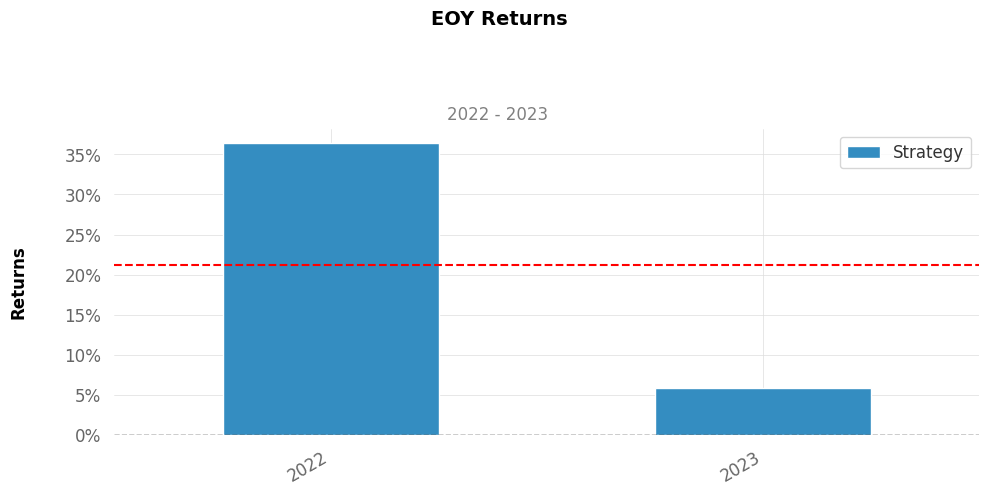

In [17]:
# qs.plots.yearly_returns(profit_x, savefig='yearly_returns_real.png')
qs.plots.yearly_returns(returns_df_x['total_profit'], savefig='ena_regular_strategy_yearly_returns_real.png')

## generate full report (tear file) using quantstats

In [18]:
qs.reports.html(returns_df_x['total_profit'], title='ema regular order strategy', output='', download_filename='ema_regular_order_strategy.html')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

                           Strategy
-------------------------  ----------
Start Period               2022-01-06
End Period                 2023-03-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          44.44%
CAGR﹪                     35.02%

Sharpe                     1.97
Prob. Sharpe Ratio         99.72%
Smart Sharpe               1.9
Sortino                    4.17
Smart Sortino              4.02
Sortino/√2                 2.95
Smart Sortino/√2           2.84
Omega                      1.43

Max Drawdown               -5.2%
Longest DD Days            63
Volatility (ann.)          11.86%
Calmar                     6.73
Skew                       1.54
Kurtosis                   3.8

Expected Daily %           0.09%
Expected Monthly %         2.48%
Expected Yearly %          20.18%
Kelly Criterion            12.86%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.14%
Expected Shortfall (cVaR)  -1.14%

Max Consecutive Wins       7


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-02-18,2022-03-15,2022-04-22,63,-5.204673,-4.986229
2,2022-06-22,2022-07-11,2022-08-23,62,-4.657308,-4.467382
3,2022-11-16,2022-12-12,2022-12-26,40,-4.310280,-4.302704
4,2022-02-01,2022-02-08,2022-02-15,14,-4.138659,-3.879393
5,2022-01-13,2022-01-18,2022-01-27,14,-3.639241,-3.372231


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


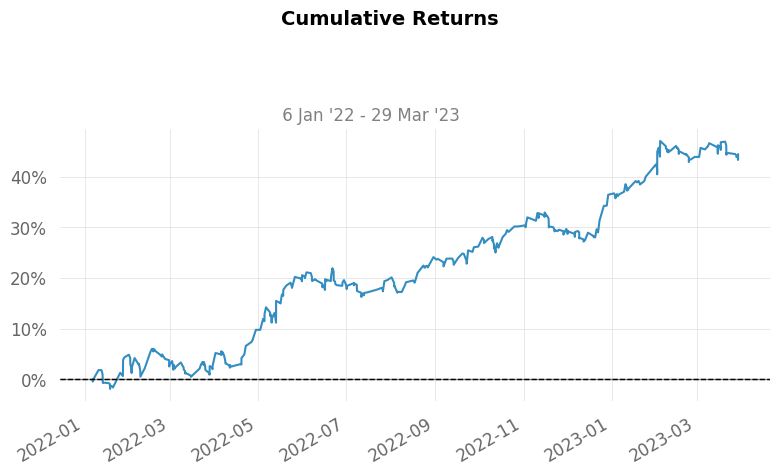

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


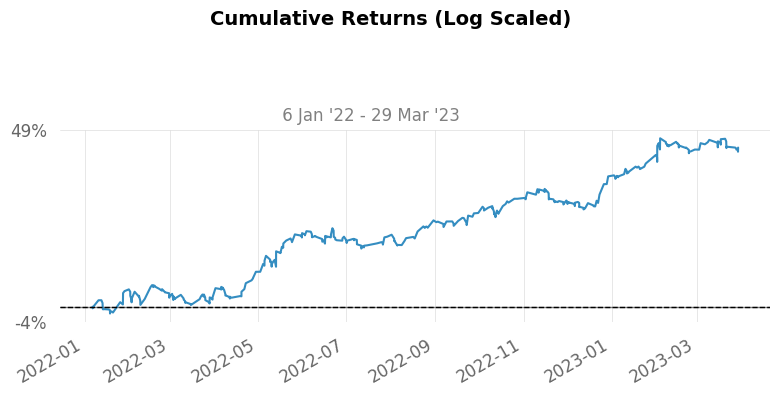

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


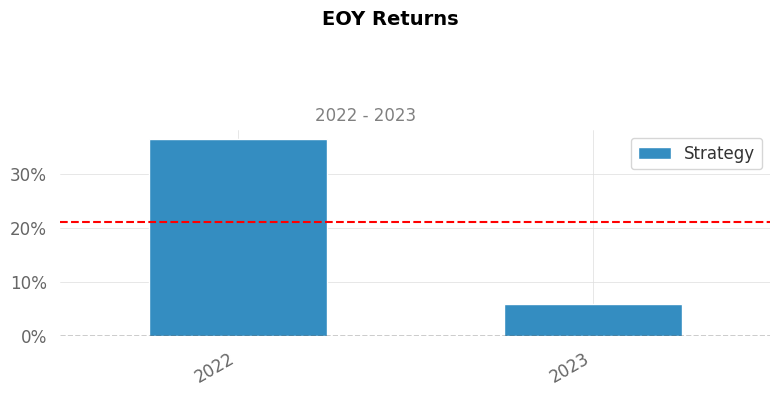

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


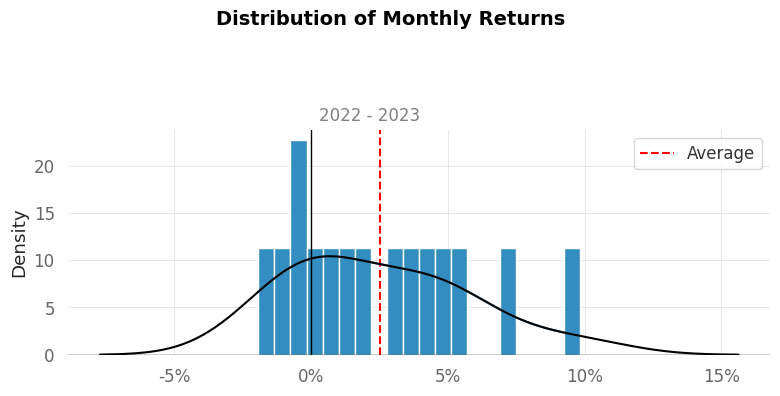

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


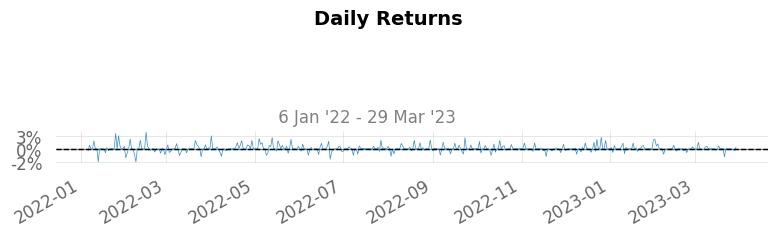

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


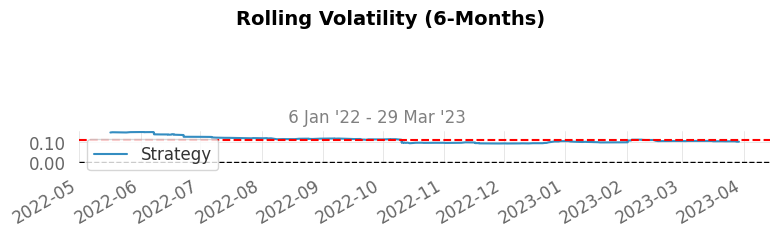

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


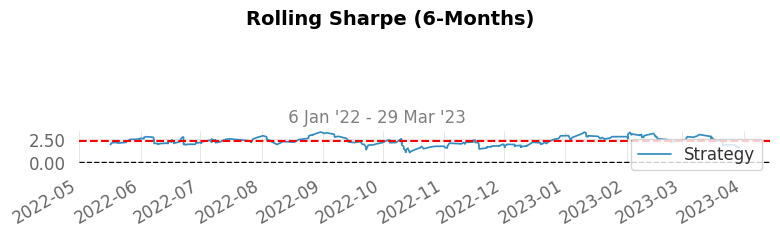

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


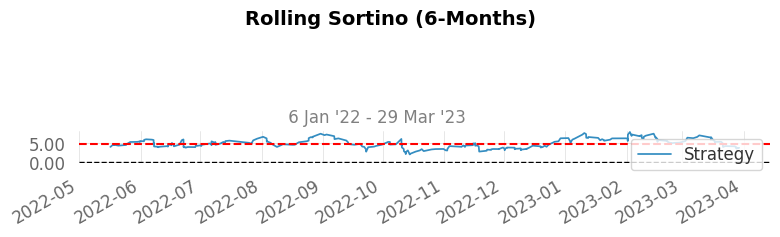

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


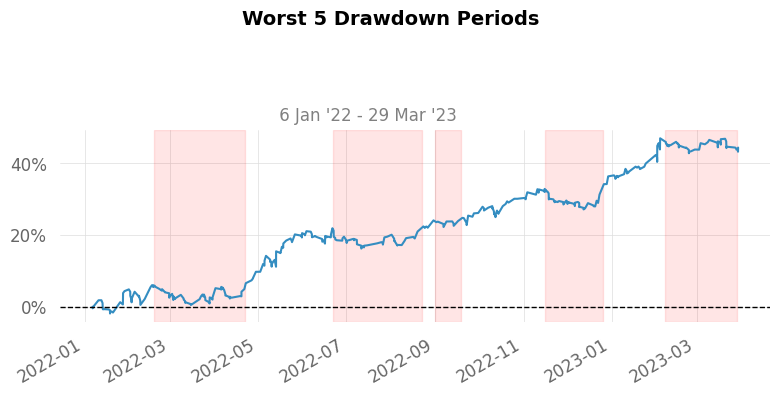

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


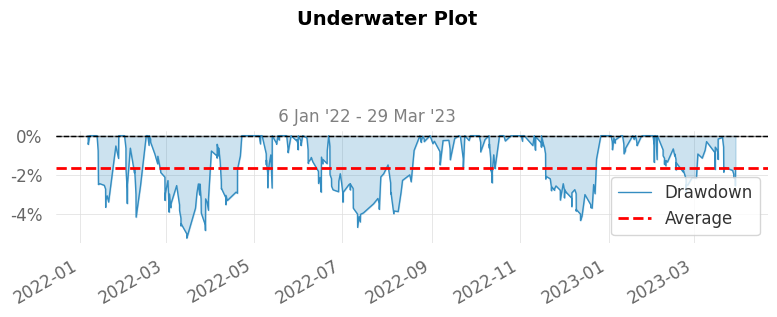

/home/prithvirajgotepatil/virtualenvs/jupyter_venv/lib/python3.10/site-packages/quantstats/stats.py:982: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


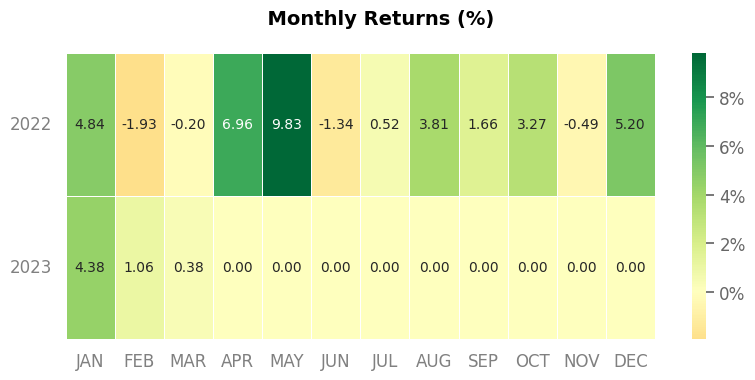

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


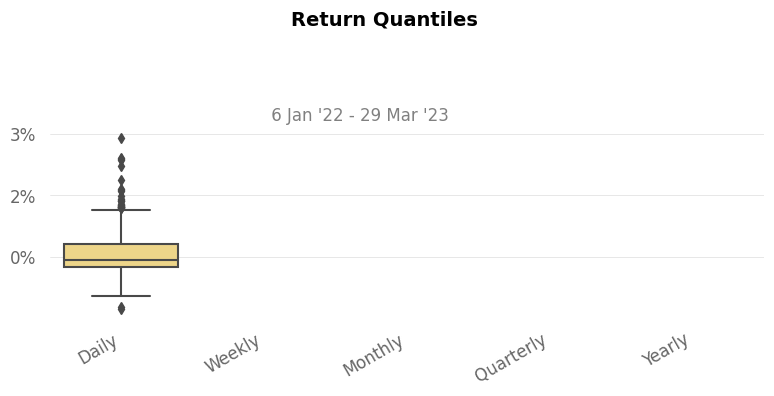

In [20]:
qs.reports.full(returns_df_x['total_profit'])